<a href="https://colab.research.google.com/github/Zafar-Lab/scDREAMER/blob/main/2109_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%tensorflow_version 1.x

In [2]:
import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings('ignore')
"""
!pip install -U scipy==1.5.0
!pip install scanpy==1.8.2
!pip install -U scikit-learn
"""

'\n!pip install -U scipy==1.5.0\n!pip install scanpy==1.8.2\n!pip install -U scikit-learn\n'

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
import os
import numpy as np

In [6]:
tf.enable_eager_execution()
np.random.seed(0)
tf.set_random_seed(0)

W0311 16:29:52.662644 140061794317120 module_wrapper.py:139] From /tmp/ipykernel_1379088/734876430.py:1: The name tf.enable_eager_execution is deprecated. Please use tf.compat.v1.enable_eager_execution instead.

W0311 16:29:52.664757 140061794317120 module_wrapper.py:139] From /tmp/ipykernel_1379088/734876430.py:3: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



Building model

In [7]:
import os
print (os.getcwd())

/home/ajita/Documents/data_integration/scDREAMER/scDREAMER


In [8]:
#data_path = "/home/ajita/Documents/data_integration/Immune/Immune_ALL_human.h5ad"
data_path = "/home/ajita/Documents/data_integration/Human_Retina/Human_Retina.h5ad"
#Lung_wrong_label_10
#data_path = "/home/ajita/Documents/data_integration/Lung/Lung_wrong_label_10.h5ad"
#data_path = "/home/ajita/Documents/data_integration/Immune/Immune_Human_NA_0.2.h5ad" #0.2.
#data_path = "/home/ajita/Documents/data_integration/Lung/Lung_NA_0.2.h5ad"

In [9]:
name = "Human_Retina"

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation', # 16
                 'Lung' : 'cell_type', # 
                 'Pancreas' : 'celltype', #
                 'Human_Mouse' : "celltype", #
                 "Human_Retina":"Subcluster" #
                    }    
our_method_emb_dic = {'Immune_Human' : 'Immune_Human_case2_latent_matrix_c_300',
                 'Lung' : 'Lung_case2_latent_matrix_c_300',
                 'Pancreas' : 'Pancreas_case2_latent_matrix_c_250',
                 'Human_Retina': "retina_case2_latent_matrix_c_300"    
                }  

W0311 16:29:53.743670 140061794317120 module_wrapper.py:139] From /tmp/ipykernel_1379088/104117075.py:11: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0311 16:29:53.745561 140061794317120 module_wrapper.py:139] From /tmp/ipykernel_1379088/104117075.py:16: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2023-03-11 16:29:53.747280: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-03-11 16:29:53.778643: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2023-03-11 16:29:53.788799: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5564cafd39d0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-03-11 16:29:53.788876: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-03

came in load_gene
updated hvg


W0311 16:30:42.665958 140061794317120 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_minibatch.py:9: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0311 16:30:42.675392 140061794317120 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_minibatch.py:246: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0311 16:30:42.676265 140061794317120 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_minibatch.py:18: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0311 16:30:42.676726 140061794317120 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  

here [ 4  8  9 ... 11 11  6]
Shape self.data_train: (30302, 2000)
Shape self.data_test: (30302, 2000)
encoder input shape  Tensor("concat:0", shape=(?, 2030), dtype=float32)


W0311 16:30:43.304778 140061794317120 deprecation.py:506] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_minibatch.py:275: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0311 16:30:43.465652 140061794317120 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_minibatch.py:42: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0311 16:30:43.467381 140061794317120 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_minibatch.py:529: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



decoder input shape  Tensor("concat_2:0", shape=(?, 40), dtype=float32)


W0311 16:30:43.689283 140061794317120 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_minibatch.py:41: The name tf.log is deprecated. Please use tf.math.log instead.

W0311 16:30:43.709078 140061794317120 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/utils_minibatch.py:41: The name tf.lgamma is deprecated. Please use tf.math.lgamma instead.

W0311 16:30:43.768555 140061794317120 deprecation.py:323] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_minibatch.py:105: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

W0311 16:30:43.818882 140061794317120 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scD

KL gaussian z Tensor("mul_9:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_8:0", shape=(?,), dtype=float32)
Cluster DRA on DataSet /home/ajita/Documents/data_integration/Human_Retina/Human_Retina.h5ad ... 


W0311 16:30:46.263640 140061794317120 module_wrapper.py:139] From /home/ajita/Documents/data_integration/scDREAMER/scDREAMER/model_minibatch.py:143: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.



Epoch : [0] ,  a_loss = 310.9820, d_loss: -0.1977
Epoch : [1] ,  a_loss = 299.0901, d_loss: -0.0286
Epoch : [2] ,  a_loss = 291.7360, d_loss: -0.0232
Epoch : [3] ,  a_loss = 286.8080, d_loss: -0.0396
Epoch : [4] ,  a_loss = 284.0123, d_loss: -0.0860
Epoch : [5] ,  a_loss = 281.2441, d_loss: -0.1344
Epoch : [6] ,  a_loss = 279.1213, d_loss: -0.1203
Epoch : [7] ,  a_loss = 278.1837, d_loss: -0.1972
Epoch : [8] ,  a_loss = 276.2121, d_loss: -0.2572
Epoch : [9] ,  a_loss = 274.9705, d_loss: -0.3062
Epoch : [10] ,  a_loss = 273.8006, d_loss: -0.3485
Epoch : [11] ,  a_loss = 272.4873, d_loss: -0.3066
Epoch : [12] ,  a_loss = 271.5094, d_loss: -0.2731
Epoch : [13] ,  a_loss = 270.2884, d_loss: -0.2697
Epoch : [14] ,  a_loss = 269.4196, d_loss: -0.2606
Epoch : [15] ,  a_loss = 268.6879, d_loss: -0.2693
Epoch : [16] ,  a_loss = 267.8154, d_loss: -0.3783
Epoch : [17] ,  a_loss = 266.7943, d_loss: -0.3342
Epoch : [18] ,  a_loss = 266.0324, d_loss: -0.5222
Epoch : [19] ,  a_loss = 265.5532, d_loss

Epoch : [160] ,  a_loss = 242.8241, d_loss: -0.5674
Epoch : [161] ,  a_loss = 242.3117, d_loss: -0.3950
Epoch : [162] ,  a_loss = 242.8366, d_loss: -0.5425
Epoch : [163] ,  a_loss = 242.7687, d_loss: -0.5112
Epoch : [164] ,  a_loss = 242.5318, d_loss: -0.4721
Epoch : [165] ,  a_loss = 242.8044, d_loss: -0.5725
Epoch : [166] ,  a_loss = 242.4449, d_loss: -0.5664
Epoch : [167] ,  a_loss = 242.8579, d_loss: -0.5093
Epoch : [168] ,  a_loss = 242.6329, d_loss: -0.5458
Epoch : [169] ,  a_loss = 242.5312, d_loss: -0.5582
Epoch : [170] ,  a_loss = 242.3142, d_loss: -0.5262
Epoch : [171] ,  a_loss = 242.3498, d_loss: -0.4770
Epoch : [172] ,  a_loss = 242.4213, d_loss: -0.5127
Epoch : [173] ,  a_loss = 242.4271, d_loss: -0.2983
Epoch : [174] ,  a_loss = 242.3382, d_loss: -0.4961
Epoch : [175] ,  a_loss = 242.1205, d_loss: -0.4659
Epoch : [176] ,  a_loss = 242.6138, d_loss: -0.4491
Epoch : [177] ,  a_loss = 242.2710, d_loss: -0.4340
Epoch : [178] ,  a_loss = 242.1054, d_loss: -0.4138
Epoch : [179

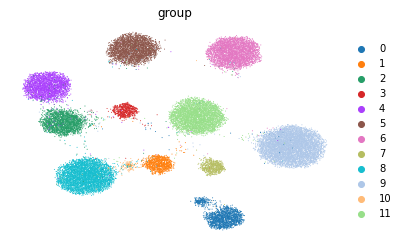

None


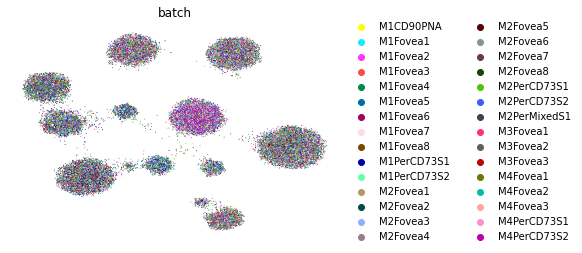

None
Computing NMI ...
Done !
NMI = 0.9257702828048088


In [10]:
#import model
#import model_wo_Dis as model# without Discriminator
#import model_wo_BC as model # without Batch Classiifer

#import model_scanvi_semisupervised as model
#import model_prior as model
import model_minibatch as model

#import model_only_scanvi as model

run_config = tf.ConfigProto()

run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
run_config.gpu_options.allow_growth = True

with tf.Session(config = run_config) as sess:

    dreamer = model.scDREAMER(
        sess,
        epoch = 300,
        dataset_name = data_path,
        batch = batch_key_dic[name],
        cell_type = cell_type_key_dic[name],
        name = name
        )

    dreamer.train_cluster()

